In [1]:
from arctic import CHUNK_STORE, Arctic

/home/azureuser/miniconda3/envs/fundopt/lib/python3.9/site-packages/arctic-1.80.0-py3.9.egg/arctic/store/_pandas_ndarray_store.py:8: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


In [41]:
import datetime

In [2]:
a = Arctic('localhost')
a.initialize_library('fund', lib_type=CHUNK_STORE)

lib = a['fund']

Library created, but couldn't enable sharding: no such command: 'enablesharding', full error: {'ok': 0.0, 'errmsg': "no such command: 'enablesharding'", 'code': 59, 'codeName': 'CommandNotFound'}. This is OK if you're not 'admin'


In [3]:
import pandas as pd

In [5]:
len( lib.list_symbols() )

3799

In [6]:
# lib.delete( '000001' )
lib.get_info('000198') 

{'chunk_count': 17,
 'len': 494,
 'appended_rows': 0,
 'metadata': {'columns': ['date', 'weeklyReturn', 'dailyProfit']},
 'chunker': 'date',
 'chunk_size': 'M',
 'serializer': 'FrameToArray'}

In [42]:
start = datetime.date(2020, 5, 7)
end = datetime.date(2021, 5, 7)

request_dates = pd.date_range(start, end)

In [15]:
df = lib.read( '000198', chunk_range=request_dates )

In [16]:
df.shape

(366, 2)

In [21]:
df.dailyProfit.rolling(window=20, center=False).sum()

date
2020-05-07        NaN
2020-05-08        NaN
2020-05-09        NaN
2020-05-10        NaN
2020-05-11        NaN
               ...   
2021-05-03    11.7247
2021-05-04    11.7106
2021-05-05    11.6882
2021-05-06    11.6709
2021-05-07    11.6482
Name: dailyProfit, Length: 366, dtype: float64

In [24]:
checkdf = pd.concat([ df.dailyProfit, df.dailyProfit.rolling(window=20, center=False).sum()], axis=1)

In [26]:
checkdf.to_csv('check.csv')

In [32]:
import numpy as np

In [48]:
from fundopt.fundtsloader import getTSLoader

In [49]:
loader = getTSLoader('000198')

In [50]:
loader.load(start, end)

In [51]:
loader.getReturnByDate(datetime.date(2020, 5, 10), datetime.date(2020, 6,5))

0.0011212200000000002

In [52]:
loader.getReturnTS(start, end, 20)

TypeError: Invalid comparison between dtype=datetime64[ns] and date

In [11]:
df.index.max()

Timestamp('2021-05-08 00:00:00')

In [12]:
df.index.min()

Timestamp('2020-01-01 00:00:00')

In [13]:
df.shape

(494, 2)

In [14]:
df2 = lib.read('161908', chunk_range=pd.bdate_range('2019-04-24','2020-04-24'))

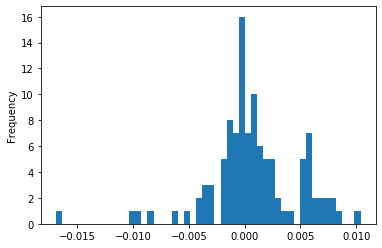

In [15]:
df2.ACC_NAV.diff().plot.hist(bins = 50)

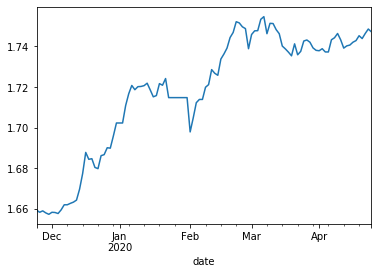

In [18]:
df2.ACC_NAV.plot()

In [10]:
lib.list_symbols()

['000001',
 '000003',
 '000004',
 '000005',
 '000007',
 '000008',
 '000009',
 '000011',
 '000014',
 '000015',
 '000016',
 '000017',
 '000020',
 '000021',
 '000022',
 '000024',
 '000025',
 '000026',
 '000027',
 '000028',
 '000029',
 '000030',
 '000031',
 '000032',
 '000033',
 '000037',
 '000039',
 '000041',
 '000042',
 '000043',
 '000044',
 '000045',
 '000046',
 '000047',
 '000048',
 '000049',
 '000050',
 '000051',
 '000052',
 '000053',
 '000054',
 '000055',
 '000056',
 '000057',
 '000058',
 '000059',
 '000061',
 '000062',
 '000063',
 '000064',
 '000065',
 '000066',
 '000067',
 '000068',
 '000069',
 '000070',
 '000071',
 '000072',
 '000073',
 '000074',
 '000075',
 '000076',
 '000077',
 '000078',
 '000079',
 '000080',
 '000081',
 '000082',
 '000083',
 '000084',
 '000085',
 '000086',
 '000087',
 '000088',
 '000089',
 '000090',
 '000091',
 '000092',
 '000093',
 '000103',
 '000104',
 '000105',
 '000106',
 '000107',
 '000109',
 '000110',
 '000111',
 '000112',
 '000113',
 '000115',
 '000116',